In [1]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/{accelerator}/torch_nightly.html
  
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.backends.cudnn.enabled)

!pip install fastai

import fastai
from fastai import *
from fastai.vision import *


import numpy as np
import pandas as pd

Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
    100% |████████████████████████████████| 578.2MB 23kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x6245e000 @  0x7f34ebfb42a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x4f3338 0x510fb0 0x5119bd 0x4f6070
1.0.0.dev20181029
True
True
    100% |████████████████████████████████| 112kB 4.1MB/s 
    100% |████████████████████████████████| 9.0MB 3.9MB/s 
    100% |████████████████████████████████| 61kB 25.0MB/s 
    100% |████████████████████████████████| 1.0MB 19.9MB/s 
    100% |████████████████████████████████| 112kB 26.7MB/s 
    100% |████████████████████████████████| 112kB 30.4MB/s 
    100% |████████████████████████████████| 2.2MB 14.3MB/s 
  Running setup.py bdist_wheel for prometheus-client ... - done
  Sto

In [3]:
!ls -alh

total 872M
drwxr-xr-x 1 root root 4.0K Nov  2 16:13 .
drwxr-xr-x 1 root root 4.0K Nov  2 16:11 ..
drwxr-xr-x 4 root root 4.0K Nov  1 16:29 .config
drwxr-xr-x 2 root root 4.0K Nov  1 16:42 sample_data
-rw-r--r-- 1 root root 871M Nov  2 16:25 USA_SNAKES.zip


In [2]:
!unzip USA_SNAKES.zip

Archive:  USA_SNAKES.zip
   creating: USA_SNAKES/
   creating: USA_SNAKES/Coral/
  inflating: USA_SNAKES/Coral/1. 15390754139_6b85681f64_b.jpg  
  inflating: USA_SNAKES/Coral/1. 220px-micruroides_euryxanthus.jpg  
 extracting: USA_SNAKES/Coral/1. 2562524532_6c6a35ebbe_b.jpg  
 extracting: USA_SNAKES/Coral/1. coral-snake.png  
  inflating: USA_SNAKES/Coral/1. eastern-coral-snake-660x400.jpg  
  inflating: USA_SNAKES/Coral/1. hqdefault.jpg  
  inflating: USA_SNAKES/Coral/1. micrurus_tener.jpg  
  inflating: USA_SNAKES/Coral/10. coral02.jpg  
  inflating: USA_SNAKES/Coral/10. micruroides-euryxanthus3a-rancho-viejo-s-la-purica-b51-623x1024.jpg  
  inflating: USA_SNAKES/Coral/10. texas-coral-snake-1.jpg  
  inflating: USA_SNAKES/Coral/100. 171323533-texas-coral-snake-otter-fallen-leaves-forest-soil.jpg  
  inflating: USA_SNAKES/Coral/100. head-and-nek-markings-arizona-coral-snake-gary-nafis.jpg  
  inflating: USA_SNAKES/Coral/11. 6610312261_fd53de36fd.jpg  
  inflating: USA_SNAKES/Coral/11.

In [0]:
#!rm -rf USA_SNAKES/

In [0]:
!mkdir USA_SNAKES/train
!mv USA_SNAKES/PitViper USA_SNAKES/train
!mv USA_SNAKES/NotDangerous USA_SNAKES/train
!mv USA_SNAKES/Coral USA_SNAKES/train

In [0]:
tfms=get_transforms(max_zoom=1.1)

In [0]:
w=torch.cuda.FloatTensor([1.0, 0.25, 1.75])

In [6]:
data = ImageDataBunch.from_folder("USA_SNAKES/", ds_tfms=tfms, bs=28, size=299, valid_pct=0.2, num_workers=0,loss_func=torch.nn.CrossEntropyLoss(weight=w))
data.normalize(imagenet_stats)

In [7]:
learn = create_cnn(data, models.resnet50, metrics=error_rate,loss_func=torch.nn.CrossEntropyLoss(weight=w))

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:02<00:00, 49276432.10it/s]


In [8]:
learn.fit_one_cycle(4,0.001)

Total time: 15:06
epoch  train_loss  valid_loss  error_rate
1      0.588893    0.481806    0.169399    (04:09)
2      0.444597    0.353529    0.120219    (03:38)
3      0.280394    0.274957    0.102004    (03:36)
4      0.216573    0.210035    0.081967    (03:41)



In [0]:
#learn.set_data(data.resize(340))

In [27]:
accuracy(*learn.get_preds())


tensor(0.9042)

In [0]:
w=torch.FloatTensor([1.0, 0.25, 1.75])
learn.loss_func=torch.nn.CrossEntropyLoss(weight=w)

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
#interp.plot_top_losses(15, figsize=(15,11))


In [0]:
doc(interp.plot_top_losses)


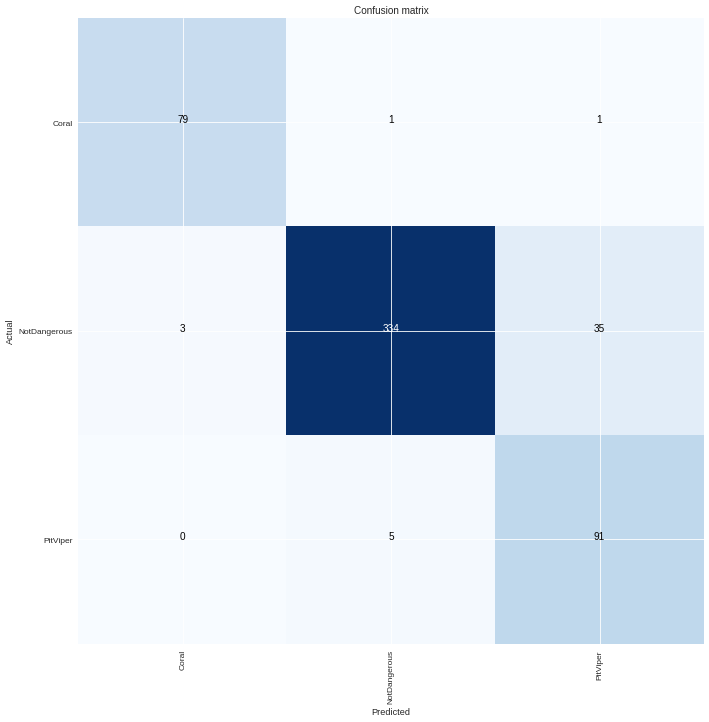

In [12]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)


In [13]:
interp.most_confused(min_val=1)


[('NotDangerous', 'PitViper', 35),
 ('PitViper', 'NotDangerous', 5),
 ('NotDangerous', 'Coral', 3)]

In [0]:
learn.save("snakes-usa")


In [0]:
w=torch.cuda.FloatTensor([1.0, 0.25, 1.75])
learn.loss_func=torch.nn.CrossEntropyLoss(weight=w)

In [16]:
learn.unfreeze()
learn.fit_one_cycle(4,0.001)

epoch,train_loss,valid_loss,error_rate
1,0.523279,6.604388,0.326047
2,0.721686,0.620589,0.276867
3,0.528988,0.620064,0.306011


KeyboardInterrupt: ignored

In [0]:
learn.load("snakes-usa")

In [0]:
from google.colab import files

files.download('USA_SNAKES/models/snakes-usa.pth')